In [ ]:
!pwd
import tensorflow as tf
print(tf.config.list_physical_devices('GPU'))

/mnt/c/Users/jesru/Deep Learning Project


2025-04-06 01:01:48.257232: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-04-06 01:01:48.638715: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-04-06 01:01:48.789735: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-04-06 01:01:48.831728: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-04-06 01:01:49.164248: I tensorflow/core/platform/cpu_feature_guar

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras.datasets import cifar10
from tensorflow.keras import regularizers
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras import layers, models

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

print("Full training data shape:", x_train.shape)
print("Training labels shape:", y_train.shape)
print("Test data shape:", x_test.shape)

2025-03-31 21:22:49.644250: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-03-31 21:22:49.671017: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-03-31 21:22:49.689953: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-03-31 21:22:49.696134: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-03-31 21:22:49.718861: I tensorflow/core/platform/cpu_feature_guar

Full training data shape: (50000, 32, 32, 3)
Training labels shape: (50000, 1)
Test data shape: (10000, 32, 32, 3)


/tmp/ipykernel_7437/3432490645.py:15: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  label_index = int(y_train[idx])


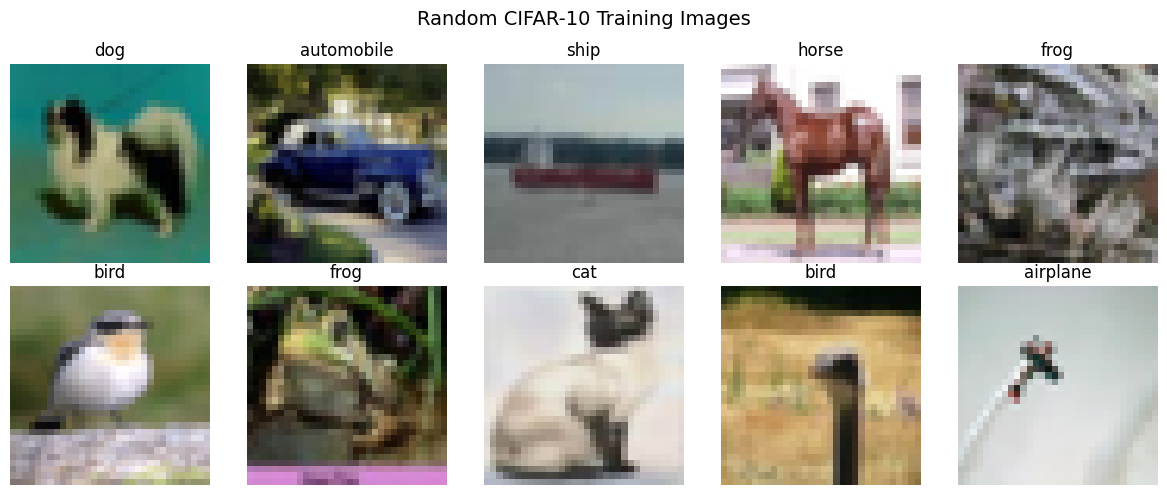

In [2]:
#Define class names for CIFAR-10 labels (0–9)

#CIFAR-10 provides numeric labels (0 to 9).
#We use class_names to convert them into meaningful category names for visualizations and predictions.

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']


plt.figure(figsize=(12, 5))
for i in range(10):
    idx = np.random.randint(0, x_train.shape[0])
    plt.subplot(2, 5, i+1)
    plt.imshow(x_train[idx])
    label_index = int(y_train[idx])
    plt.title(class_names[label_index])
    plt.axis('off')
plt.suptitle("Random CIFAR-10 Training Images", fontsize=14)
plt.tight_layout()
plt.show()

In [3]:
#Showing image shape and pixel value range before normalization
print("Image shape:", x_train[0].shape)
print("Pixel range before normalization:", x_train.min(), "-", x_train.max())

Image shape: (32, 32, 3)
Pixel range before normalization: 0 - 255


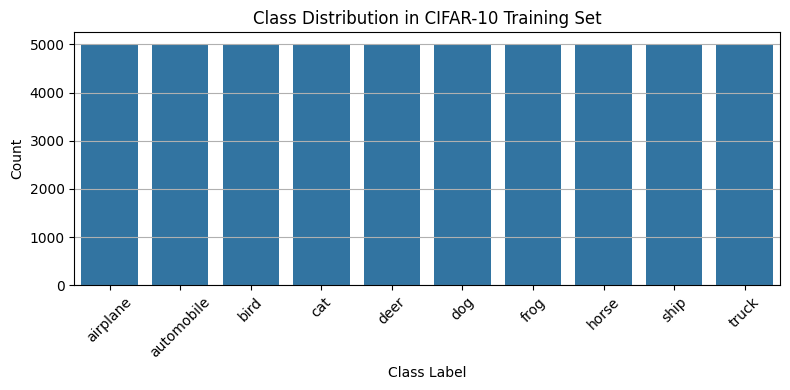

In [4]:
# Flatten labels
labels_flat = y_train.flatten()

# Plot distribution
plt.figure(figsize=(8, 4))
sns.countplot(x=labels_flat)
plt.title("Class Distribution in CIFAR-10 Training Set")
plt.xlabel("Class Label")
plt.ylabel("Count")
plt.xticks(ticks=np.arange(10), labels=class_names, rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

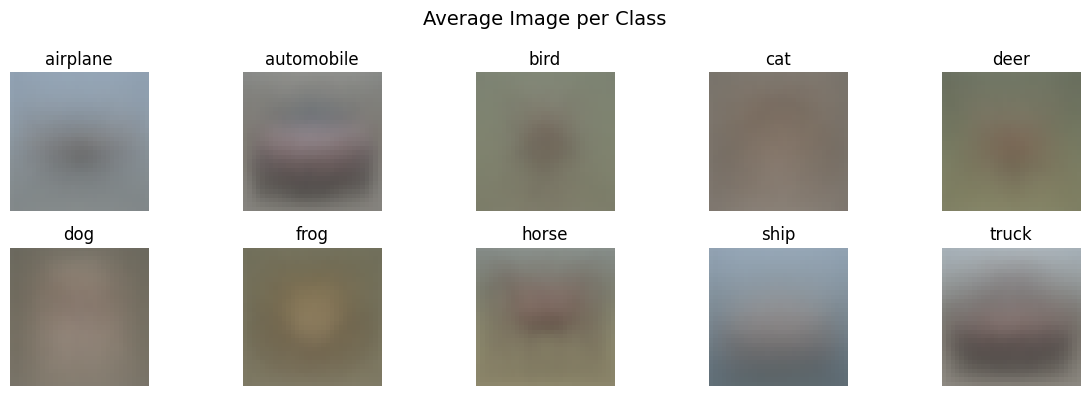

In [5]:
#Compute and visualize average image per class

avg_images = []
for label in range(10):
    imgs = x_train[y_train.flatten() == label]
    avg_img = np.mean(imgs, axis=0)
    avg_images.append(avg_img)

# Show average images
plt.figure(figsize=(12, 4))
for i, avg_img in enumerate(avg_images):
    plt.subplot(2, 5, i+1)
    plt.imshow(avg_img.astype('uint8'))
    plt.title(class_names[i])
    plt.axis('off')
plt.suptitle("Average Image per Class", fontsize=14)
plt.tight_layout()
plt.show()

In [6]:
#Normalize image data
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

print("Min:", x_train.min())
print("Max:", x_train.max())


Min: 0.0
Max: 1.0


In [7]:
#Split the 50,000 training set into training (90%) and validation (10%)

x_Train1, x_val1, y_Train1, y_val1 = train_test_split(
    x_train, y_train, test_size=0.1, stratify=y_train, random_state=42
)

# Show final data shapes
print("Training set:", x_Train1.shape)
print("Validation set:", x_val1.shape)
print("Test set:", x_test.shape)

Training set: (45000, 32, 32, 3)
Validation set: (5000, 32, 32, 3)
Test set: (10000, 32, 32, 3)


In [8]:
#STEP 2
#Building a CNN

model= models.Sequential()

# 1st Convolution + Pooling
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))

# 2nd Convolution + Pooling
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# 3rd Convolution
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

# Flatten and Dense layers
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))  # 10 output classes

/home/jonty/miniconda3/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
I0000 00:00:1743474176.095990    7437 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1743474176.258658    7437 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1743474176.258781    7437 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1743474176.267177    7437 cuda_execut

In [9]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        65,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 122,570 (478.79 KB)

 Trainable params: 122,570 (478.79 KB)

 Non-trainable params: 0 (0.00 B)

In [10]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',  # Use this when labels are integers
    metrics=['accuracy']
)

In [11]:
history = model.fit(
    x_Train1, y_Train1,
    epochs=10,
    batch_size=64,
    validation_data=(x_val1, y_val1)
)

Epoch 1/10


I0000 00:00:1743474178.831711    7539 service.cc:146] XLA service 0x7f0b68005480 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1743474178.831895    7539 service.cc:154]   StreamExecutor device (0): NVIDIA GeForce RTX 4070 Laptop GPU, Compute Capability 8.9
2025-03-31 21:22:58.867727: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2025-03-31 21:22:59.146379: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:531] Loaded cuDNN version 8907


 47/704 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.1263 - loss: 2.2932

I0000 00:00:1743474181.033461    7539 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


704/704 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.3212 - loss: 1.8370 - val_accuracy: 0.5092 - val_loss: 1.3565
Epoch 2/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5472 - loss: 1.2706 - val_accuracy: 0.5866 - val_loss: 1.1607
Epoch 3/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6104 - loss: 1.1021 - val_accuracy: 0.6358 - val_loss: 1.0539
Epoch 4/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6495 - loss: 1.0014 - val_accuracy: 0.6552 - val_loss: 0.9801
Epoch 5/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6756 - loss: 0.9231 - val_accuracy: 0.6756 - val_loss: 0.9264
Epoch 6/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7008 - loss: 0.8539 - val_accuracy: 0.6876 - val_loss: 0.9148
Epoch 7/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7201 - loss: 0.7956 - val_accuracy: 0.6836 - val_loss: 0.9196
Epoch 8/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7357 - loss: 0.7521 - val_accuracy: 0.6892 - val_

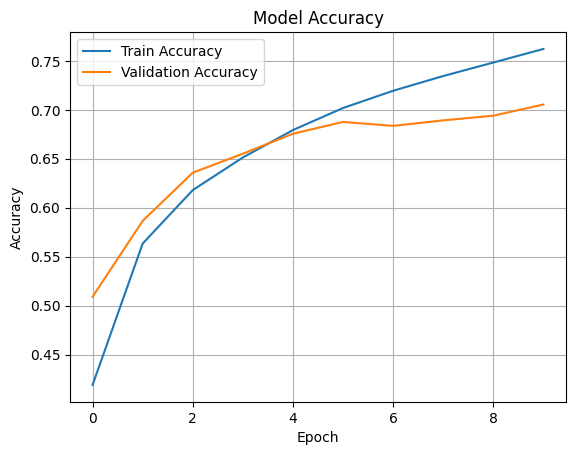

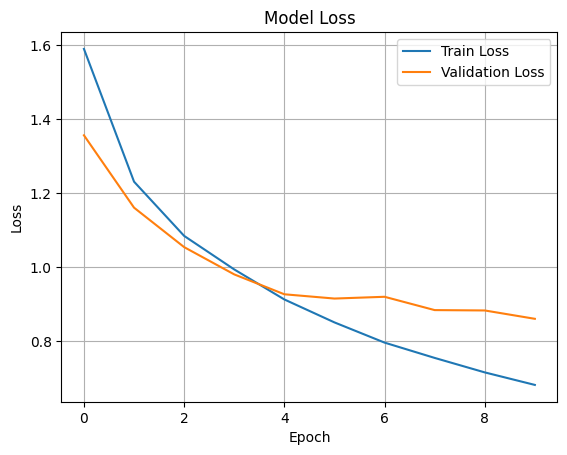

In [12]:
# Accuracy plot
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Loss plot
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Classification Report:

              precision    recall  f1-score   support

    airplane       0.79      0.71      0.75      1000
  automobile       0.83      0.81      0.82      1000
        bird       0.67      0.52      0.59      1000
         cat       0.51      0.58      0.54      1000
        deer       0.57      0.76      0.65      1000
         dog       0.68      0.53      0.60      1000
        frog       0.72      0.82      0.76      1000
       horse       0.82      0.72      0.77      1000
        ship       0.77      0.84      0.80      1000
       truck       0.80      0.79      0.79      1000

    accuracy                           0.71     10000
   macro avg       0.72      0.71      0.71     10000
weighted avg       0.72      0.71      0.71     10000



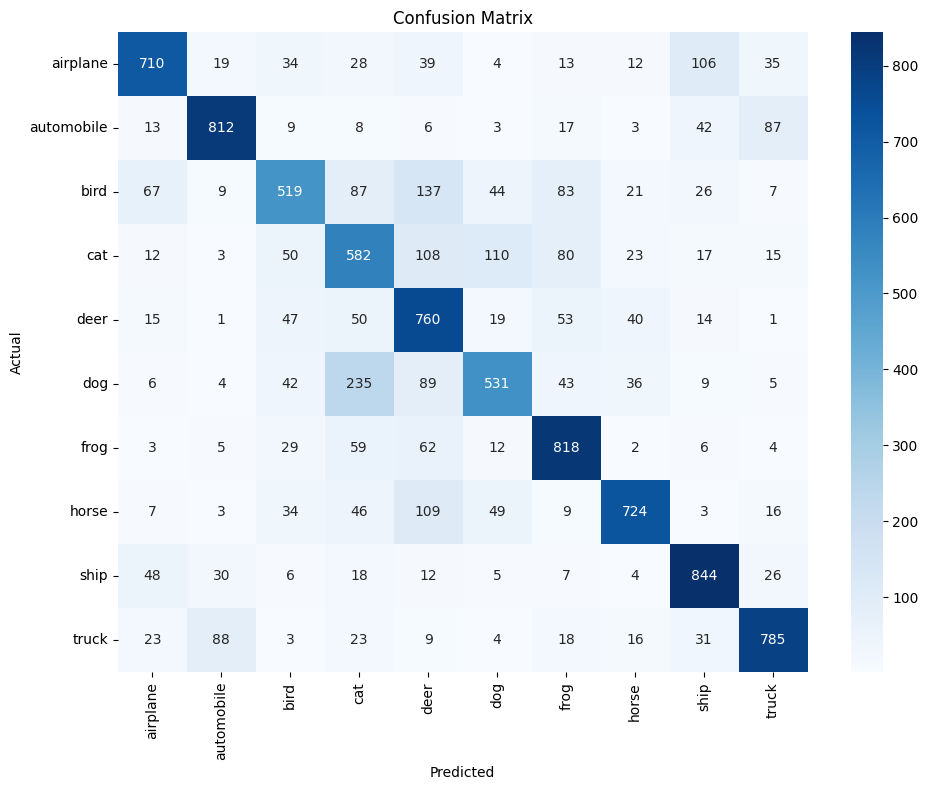

In [13]:
#STEP 3

# Predict on test set
y_pred_probs = model.predict(x_test)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = y_test.flatten()

# Classification report
print("Classification Report:\n")
print(classification_report(y_true, y_pred, target_names=class_names))

# Confusion matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()

In [14]:
### Step 3: Model Evaluation Summary

#- **Accuracy**: The overall accuracy reflects how many test samples were correctly classified.
# **Precision**: Shows how many selected items were relevant. High precision means few false positives.
#- **Recall**: Indicates how many relevant items were selected. High recall means few false negatives.
#- **F1-Score**: Harmonic mean of precision and recall – balances both metrics.
#- **Confusion Matrix**: Helps visualize where the model is confusing specific classes. For example, if 'cats' are often misclassified as 'dogs', it may indicate a need for better feature extraction for those classes.

#Based on the results, potential improvements could involve: 
#Adding more convolutional layers
# Applying dropout for regularization
#- Using data augmentation to enhance training variety
#- Tuning hyperparameters (learning rate, batch size, etc.)

#These improvements will be explored in Step 4.


In [15]:
#STEP 4
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.05,
    height_shift_range=0.05,
    horizontal_flip=True
)
datagen.fit(x_Train1)

In [16]:
# Improved deeper CNN with batch normalization, dropout, and L2 regularization
model_improved = models.Sequential([
    layers.Conv2D(32, (3, 3), padding='same', input_shape=(32, 32, 3)),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.Conv2D(32, (3, 3), padding='same'),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Dropout(0.2),

    layers.Conv2D(64, (3, 3), padding='same'),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.Conv2D(64, (3, 3), padding='same'),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Dropout(0.2),

    layers.Flatten(),
    layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.0005)),
    layers.Dropout(0.4),
    layers.Dense(10, activation='softmax')
])

/home/jonty/miniconda3/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [18]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

opt = Adam(learning_rate=0.0005)

model_improved.compile(
    optimizer=opt,
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=8, restore_best_weights=True)

lr_schedule = ReduceLROnPlateau(
    monitor='val_loss',
    patience=4,
    factor=0.5,
    min_lr=1e-6,
    verbose=1
)

# Train improved model
history_improved = model_improved.fit(
    datagen.flow(x_Train1, y_Train1, batch_size=64),
    steps_per_epoch=len(x_Train1) // 64,
    epochs=50,
    validation_data=(x_val1, y_val1),
    callbacks=[early_stop, lr_schedule]
)


Epoch 1/50


/home/jonty/miniconda3/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


703/703 ━━━━━━━━━━━━━━━━━━━━ 20s 21ms/step - accuracy: 0.2844 - loss: 2.2661 - val_accuracy: 0.5172 - val_loss: 1.4764 - learning_rate: 5.0000e-04
Epoch 2/50
  1/703 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.3594 - loss: 1.7301

/home/jonty/miniconda3/lib/python3.12/site-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


703/703 ━━━━━━━━━━━━━━━━━━━━ 0s 454us/step - accuracy: 0.3594 - loss: 1.7301 - val_accuracy: 0.5182 - val_loss: 1.4731 - learning_rate: 5.0000e-04
Epoch 3/50
703/703 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.4792 - loss: 1.5637 - val_accuracy: 0.6080 - val_loss: 1.2115 - learning_rate: 5.0000e-04
Epoch 4/50
703/703 ━━━━━━━━━━━━━━━━━━━━ 0s 584us/step - accuracy: 0.5312 - loss: 1.4788 - val_accuracy: 0.6104 - val_loss: 1.2045 - learning_rate: 5.0000e-04
Epoch 5/50
703/703 ━━━━━━━━━━━━━━━━━━━━ 10s 15ms/step - accuracy: 0.5421 - loss: 1.3636 - val_accuracy: 0.6008 - val_loss: 1.1764 - learning_rate: 5.0000e-04
Epoch 6/50
703/703 ━━━━━━━━━━━━━━━━━━━━ 1s 944us/step - accuracy: 0.4219 - loss: 1.5293 - val_accuracy: 0.6124 - val_loss: 1.1513 - learning_rate: 5.0000e-04
Epoch 7/50
703/703 ━━━━━━━━━━━━━━━━━━━━ 10s 14ms/step - accuracy: 0.5815 - loss: 1.2283 - val_accuracy: 0.6304 - val_loss: 1.1089 - learning_rate: 5.0000e-04
Epoch 8/50
703/703 ━━━━━━━━━━━━━━━━━━━━ 0s 501us/step - accuracy

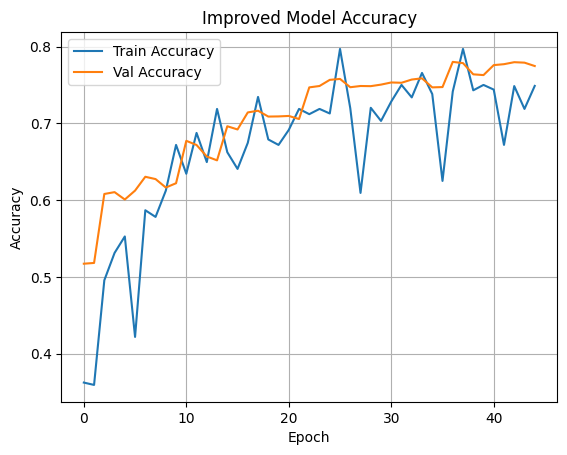

In [19]:
# Plot improved performance
plt.plot(history_improved.history['accuracy'], label='Train Accuracy')
plt.plot(history_improved.history['val_accuracy'], label='Val Accuracy')
plt.title('Improved Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

In [20]:
# Predict using the improved model
y_pred_probs_improved = model_improved.predict(x_test)

# Get class predictions (0–9)
y_pred_improved = y_pred_probs_improved.argmax(axis=1)

# Flatten true labels
y_true = y_test.flatten()


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 977us/step


In [21]:
from sklearn.metrics import classification_report

print("Classification Report (Improved Model):\n")
print(classification_report(y_true, y_pred_improved, target_names=class_names))


Classification Report (Improved Model):

              precision    recall  f1-score   support

    airplane       0.84      0.78      0.81      1000
  automobile       0.92      0.88      0.90      1000
        bird       0.73      0.61      0.66      1000
         cat       0.65      0.55      0.59      1000
        deer       0.74      0.71      0.73      1000
         dog       0.73      0.63      0.68      1000
        frog       0.62      0.95      0.75      1000
       horse       0.83      0.85      0.84      1000
        ship       0.92      0.88      0.90      1000
       truck       0.84      0.91      0.87      1000

    accuracy                           0.77     10000
   macro avg       0.78      0.77      0.77     10000
weighted avg       0.78      0.77      0.77     10000



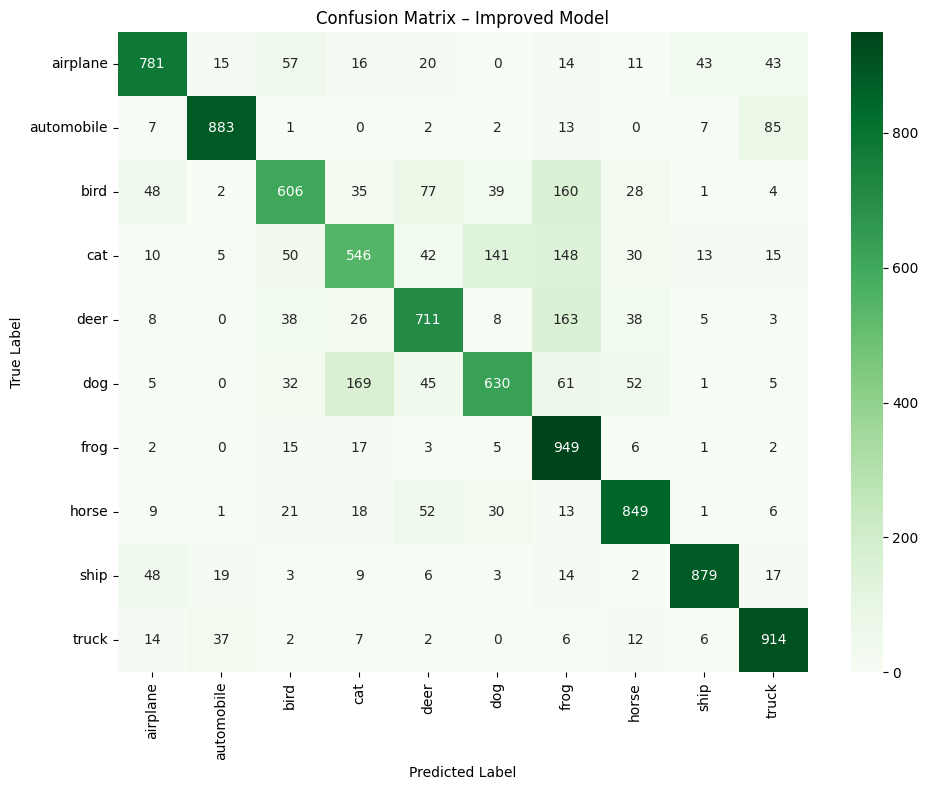

In [22]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm_improved = confusion_matrix(y_true, y_pred_improved)

plt.figure(figsize=(10, 8))
sns.heatmap(cm_improved, annot=True, fmt='d', cmap='Greens',
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix – Improved Model")
plt.tight_layout()
plt.show()